# Step 1: Process Data

In [13]:
import pandas as pd
import re
import numpy as np

def loginToHours(L):
    if L[1]=='hours' or L[1]=='hour':
        return int(L[0])
    elif L[1]=='minutes' or L[1]=='minute':
        return 0
    elif L[1]=='days' or L[1]=='day':
        return 24 * int(L[0])
    elif L[1]=='weeks' or L[1]=='week':
        return 7 * 24 * int(L[0])
    elif L[1]=='months' or L[1]=='month':
        return 30 * 24 * int(L[0])
    elif L[1]=='years' or L[1]=='year':
        return 365 * 24 * int(L[0])
    else:
        return 365 * 24 * 15

def renameCountries(country):
    if re.search('usa', country.lower()) or re.search('va', country.lower()):
        return "United States"
    elif re.search("united kingdom", country.lower()) or re.search("uk", country.lower()) or re.search("england", country.lower()):
        return "United Kingdom"
    elif re.search('bristol', country.lower()):
        return "United Kingdom"
    elif re.search('cairo', country.lower()):
        return "Egypt"
    elif re.search('rabat', country.lower()):
        return "Morocco"
    elif re.search('malm', country.lower()):
        return "Sweden"
    elif re.search('tunis', country.lower()):
        return "Tunisia"
    else:
        return country

# Load preliminary data about profiles:
SearchResults = pd.read_csv('profileURLs.csv', header = None)
SearchResults.columns = ['user_url', 'responseSpeed', 'refsandfriends', 'languages', 'couchstatus']

# Split data from refsandfriends into multiple columns
SearchResults['refsandfriends'] = list(map(lambda x: x.split('\n'), SearchResults.refsandfriends))
SearchResults['nRefs'] = list(map(lambda x: int(x[0].split(' ')[0]), SearchResults.refsandfriends))
SearchResults['nFriends'] = list(map(lambda x: re.findall("[0-9]+ Friends", str(x)), SearchResults.refsandfriends))
SearchResults['nFriends']  = list(map(lambda x: 0 if x==[] else int(x[0].split(' ')[0]), SearchResults.nFriends))
SearchResults['languages'] = list(map(lambda x: re.sub("Speaks ","", str(x)), SearchResults.languages))
SearchResults['languages'] = list(map(lambda x: str(x).split(", "), SearchResults.languages))
SearchResults['nLanguages'] = list(map(lambda x: 0 if x==['nan'] else len(x), SearchResults.languages))
#SearchResults.drop('refsandfriends', axis=1, inplace=True)

# Add profile data to search result data:
Profiles = pd.read_csv('sofariders/sofarider_profiles_7273.csv')
uselessCols = ['friends','preferredGender','maxGuests','lastMinuteOkay','languages', 'refs_fromHosts_neg', 'refs_fromHosts_pos', 'refs_fromSurfers_neg', 'refs_fromSurfers_pos', 'responseRate']
Profiles.drop(uselessCols,axis = 1, inplace=True)
Profiles.profileCompletion = list(map(lambda x: int(re.findall("[0-9]+", x)[0]), Profiles.profileCompletion))
Profiles.joinDate = list(map(lambda x: int(re.findall("[0-9]+", x)[0]), Profiles.joinDate))
Profiles.lastLogin = list(map(lambda x: x.split(" ")[-3:-1], Profiles.lastLogin))
Profiles['hoursSinceLogin'] = list(map(loginToHours, Profiles.lastLogin))
Profiles['currentCountry'] = list(map(lambda x: str(x).split(',')[-1].strip().title(),Profiles.location))
Profiles['currentCity'] = list(map(lambda x: str(x).split(',')[0].title(),Profiles.location))

# Make some minor tweaks for consistency:
Profiles['currentCountry'] = list(map(renameCountries, Profiles.currentCountry))

combined_df = pd.merge(SearchResults, Profiles, how='inner', on = 'user_url')

combined_df.to_csv('ProcessedUserInfo.csv')
combined_df

,user_url,responseSpeed,refsandfriends,languages,couchstatus,nRefs,nFriends,nLanguages,age,couchStatus,...,hometown,joinDate,lastLogin,location,profileCompletion,sex,verificationStatus,hoursSinceLogin,currentCountry,currentCity
0,https://www.couchsurfing.com/people/sherif-ash...,takes longer than a week to reply,"[0 References, 2 Friends, Speaks Egyptian arabic]",[Egyptian arabic],Accepting Guests,0,2,1,24,Accepting Guests,...,From Egypt,2017,"[29, minutes]","Cairo, Cairo Governorate, Egypt",60,Male,Unverified Profile,0,Egypt,Cairo
1,https://www.couchsurfing.com/people/shemo-best,takes longer than a week to reply,[0 References],[nan],Accepting Guests,0,0,0,28,Maybe Accepting Guests,...,No hometown listed,2018,"[24, minutes]","Cairo, Cairo Governorate, Egypt",10,Female,Unverified Profile,0,Egypt,Cairo
2,https://www.couchsurfing.com/people/ahmed-kame...,takes longer than a week to reply,"[2 References, 12 Friends, Speaks English, Ara...","[English, Arabic]",Accepting Guests,2,12,2,33,Accepting Guests,...,From Egypt,2015,"[10, hours]","Cairo, Cairo Governorate, Egypt",100,Male,Unverified Profile,10,Egypt,Cairo
3,https://www.couchsurfing.com/users/2008082305,replies within a week,"[0 References, 24 Friends, Speaks English]",[English],Accepting Guests,0,24,1,31,Maybe Accepting Guests,...,No hometown listed,2018,"[6, hours]","Cairo, Cairo Governorate, Egypt",70,Female,Unverified Profile,6,Egypt,Cairo
4,https://www.couchsurfing.com/people/mariam-eb,takes longer than a week to reply,"[0 References, Speaks English, Arabic]","[English, Arabic]",Accepting Guests,0,0,2,19,Maybe Accepting Guests,...,No hometown listed,2018,"[2, hours]","Cairo, Cairo Governorate, Egypt",65,Female,Unverified Profile,2,Egypt,Cairo
5,https://www.couchsurfing.com/users/2008856908,takes longer than a week to reply,"[0 References, Speaks Egyptian arabic]",[Egyptian arabic],Accepting Guests,0,0,1,20,Maybe Accepting Guests,...,No hometown listed,2018,"[2, hours]","Cairo, Cairo Governorate, Egypt",50,Unspecified gender,Unverified Profile,2,Egypt,Cairo
6,https://www.couchsurfing.com/people/shehab-salah,takes longer than a week to reply,"[0 References, 4 Friends, Speaks Egyptian arabic]",[Egyptian arabic],Accepting Guests,0,4,1,24,Accepting Guests,...,"From 6th of October City, Giza Governorate, Egypt",2015,"[20, hours]","6th of October city, Giza Governorate, Egypt",70,Male,Unverified Profile,20,Egypt,6Th Of October City
7,https://www.couchsurfing.com/people/rehab-rona,takes longer than a week to reply,"[0 References, 8 Friends]",[nan],Accepting Guests,0,8,0,39,Accepting Guests,...,No hometown listed,2018,"[13, hours]","Cairo, Cairo Governorate, Egypt",70,Male,Unverified Profile,13,Egypt,Cairo
8,https://www.couchsurfing.com/people/adel.atta,takes longer than a week to reply,"[1 References, 61 Friends, Speaks English]",[English],Accepting Guests,1,61,1,25,Accepting Guests,...,"From Giza Governorate, Egypt",2012,"[6, hours]","Cairo, Cairo, Egypt",100,Male,Unverified Profile,6,Egypt,Cairo
9,https://www.couchsurfing.com/people/hatem-newvip,takes longer than a week to reply,[0 References],[nan],Accepting Guests,0,0,0,39,Accepting Guests,...,No hometown listed,2018,"[35, minutes]","Cairo, Cairo Governorate, Egypt",25,Unspecified gender,Unverified Profile,0,Egypt,Cairo


# Step 2: Load Processed Data

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv('ProcessedUserInfo.csv', index_col=0)

# Step 3: Start EDA

In [15]:
df.describe()

,nRefs,nFriends,nLanguages,age,joinDate,profileCompletion,hoursSinceLogin
count,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000,7274.000000
mean,1.033544,3.422189,0.648199,29.813445,2015.567776,35.165659,10160.776739
std,6.198045,26.038989,0.841710,24.927476,2.292723,32.334732,13459.715716
min,0.000000,0.000000,0.000000,18.000000,2005.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,24.000000,2014.000000,10.000000,1440.000000
50%,0.000000,0.000000,0.000000,28.000000,2016.000000,20.000000,7200.000000
75%,0.000000,1.000000,1.000000,33.000000,2017.000000,60.000000,8760.000000
max,254.000000,1941.000000,2.000000,2018.000000,2018.000000,100.000000,131400.000000


In [16]:
df.groupby('languages').agg(['mean','count'])

nRefs        \
                                                         mean count   
languages                                                             
['Afrikaans', 'English']                             0.388889    18   
['Afrikaans']                                        0.000000     3   
['American sign language', 'English']                1.000000     1   
['Arabic', 'Berber']                                 0.000000     1   
['Arabic', 'Bulgarian']                              0.000000     1   
['Arabic', 'Egyptian arabic']                        0.500000     4   
['Arabic', 'English']                                3.741379    58   
['Arabic', 'French']                                 1.138889    36   
['Arabic', 'German']                                 1.000000     1   
['Arabic', 'Italian']                                0.000000     1   
['Arabic', 'Moroccan arabic']                        0.571429     7   
['Arabic', 'Official aramaic (700-300 bce)']         0.000000     1   
['Arabic', 'Portuguese']                             0.000000     1   
['Arabic', 'Spanish']                                0.000000     1   
['Arabic', 'Tunisian arabic']                        0.000000     1   
['Arabic']                                           0.166667    24   
['Baharna arabic', 'Egyptian arabic']                0.000000     1   
['Bengali', 'English']                               0.000000     1   
['Berber', 'Arabic']                                 0.000000     3   
['Berber', 'English']                                2.000000     1   
['Berber', 'French']                                 0.000000     1   
['British sign language', 'American sign langua...   0.000000     1   
['Catalan', 'English']                               0.000000     2   
['Central khmer', 'English']                         0.000000     1   
['Chinese', 'English']                               4.538462    13   
['Chinese', 'French']                                9.000000     1   
['Chinese', 'Hakka chinese']                         0.000000     1   
['Chinese', 'Japanese']                              2.000000     1   
['Chinese', 'Mandarin chinese']                      1.000000     4   
['Chinese', 'Yue chinese']                          15.666667     3   
...                                                       ...   ...   
['Swedish', 'German']                               20.000000     1   
['Swedish', 'Italian']                               0.000000     1   
['Swedish', 'Spanish']                               0.000000     1   
['Swedish']                                          0.818182    11   
['Tajik', 'English']                                 0.000000     1   
['Tamil', 'English']                                 0.500000     2   
['Telugu', 'English']                                0.250000     4   
['Telugu', 'Hindi']                                  0.000000     3   
['Telugu']                                           0.000000     2   
['Thai', 'English']                                  0.000000     1   
['Thai']                                             0.000000     1   
['Tunisian arabic', 'Arabic']                        0.000000     5   
['Tunisian arabic', 'English']                       0.000000     1   
['Tunisian arabic', 'French']                        0.250000    16   
['Tunisian arabic', 'Gulf arabic']                   2.000000     1   
['Tunisian arabic']                                  0.000000     2   
['Turkish', 'English']                               1.900000    10   
['Turkish', 'German']                                0.000000     1   
['Turkish', 'Kurdish']                               1.000000     1   
['Turkish']                                          6.000000     3   
['Ukrainian', 'English']                             1.500000     2   
['Ukrainian', 'Russian']                             0.000000     1   
['Urdu', 'English']                                  0.000000     2   
['Urdu', 

In [17]:
df.groupby('responseSpeed').agg(['mean','count'])

nRefs         nFriends        \
                                        mean count       mean count   
responseSpeed                                                         
replies within 1-3 days            13.000000    51  34.235294    51   
replies within a day               12.151899    79  26.797468    79   
replies within a week              11.800000   110  23.900000   110   
takes longer than a week to reply   0.653540  7034   2.616008  7034   

                                  nLanguages              age        \
                                        mean count       mean count   
responseSpeed                                                         
replies within 1-3 days             1.568627    51  29.843137    51   
replies within a day                1.506329    79  29.658228    79   
replies within a week               1.554545   110  30.263636   110   
takes longer than a week to reply   0.617714  7034  29.807933  7034   

                                      joinDate       profileCompletion        \
                                          mean count              mean count   
responseSpeed                                                                  
replies within 1-3 days            2015.372549    51         91.372549    51   
replies within a day               2014.240506    79         88.291139    79   
replies within a week              2014.745455   110         91.227273   110   
takes longer than a week to reply  2015.596958  7034         33.284760  7034   

                                  hoursSinceLogin        
                                             mean count  
responseSpeed                                            
replies within 1-3 days                246.666667    51  
replies within a day                   355.873418    79  
replies within a week                  257.927273   110  
takes longer than a week to reply    10497.643446  7034

In [18]:
df.groupby('responseSpeed').agg(['mean','count'])

nRefs         nFriends        \
                                        mean count       mean count   
responseSpeed                                                         
replies within 1-3 days            13.000000    51  34.235294    51   
replies within a day               12.151899    79  26.797468    79   
replies within a week              11.800000   110  23.900000   110   
takes longer than a week to reply   0.653540  7034   2.616008  7034   

                                  nLanguages              age        \
                                        mean count       mean count   
responseSpeed                                                         
replies within 1-3 days             1.568627    51  29.843137    51   
replies within a day                1.506329    79  29.658228    79   
replies within a week               1.554545   110  30.263636   110   
takes longer than a week to reply   0.617714  7034  29.807933  7034   

                                      joinDate       profileCompletion        \
                                          mean count              mean count   
responseSpeed                                                                  
replies within 1-3 days            2015.372549    51         91.372549    51   
replies within a day               2014.240506    79         88.291139    79   
replies within a week              2014.745455   110         91.227273   110   
takes longer than a week to reply  2015.596958  7034         33.284760  7034   

                                  hoursSinceLogin        
                                             mean count  
responseSpeed                                            
replies within 1-3 days                246.666667    51  
replies within a day                   355.873418    79  
replies within a week                  257.927273   110  
takes longer than a week to reply    10497.643446  7034

## What is the breakdown of the subset of users we have data on?

Text(0.5,1,'Current Country')

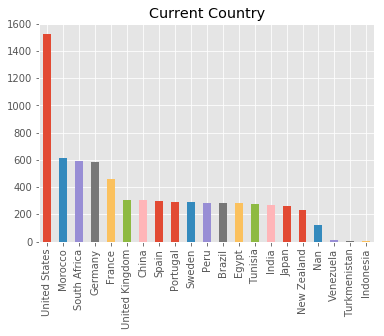

In [19]:
df['currentCountry'].value_counts().plot(kind='bar')
plt.title("Current Country")

Text(0.5,1,'Gender')

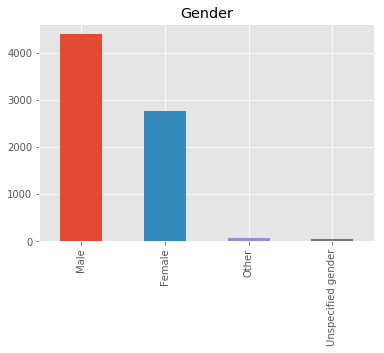

In [20]:
df['sex'].value_counts().plot(kind='bar')
plt.title("Gender")

Text(0.5,1,'Age')

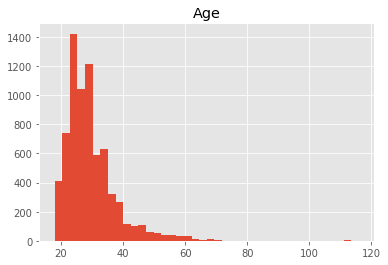

In [21]:
#df.age.value_counts().plot(kind = 'hist')
fig5 = plt.hist(df.age[df.age<122], log = False, bins = 40)
plt.title('Age')

Text(0.5,1,'Join Date')

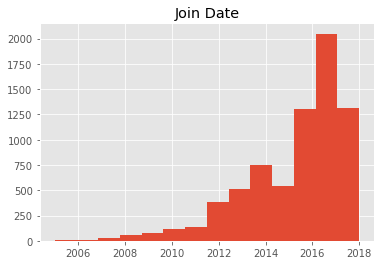

In [22]:
fig5 = plt.hist(df.joinDate, bins = 2018-2004)
plt.title('Join Date')

## How much are these users engaging overall?

Ratio of users with 5% or less of a profile: 0.19824030794610942
Ratio of users with 10% or less of a profile: 0.43222436073687104
Ratio of users with 15% or less of a profile: 0.4968380533406654
Ratio of users with 40% or more of a profile: 0.3847951608468518


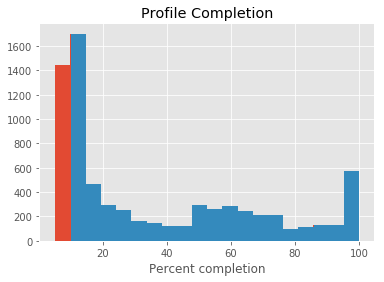

In [23]:
fig5 = plt.hist(df.profileCompletion, bins = 20)
plt.title('Profile Completion')
plt.xlabel("Percent completion")
# Since filling in name and email address gives you 5%, anyone not exceeding this threshold hasn't done more than the minimum
plt.hist(df.profileCompletion[df.profileCompletion>5], bins = 19)
print("Ratio of users with 5% or less of a profile: " + str(sum(df.profileCompletion<=5)/len(df.profileCompletion)))
print("Ratio of users with 10% or less of a profile: " + str(sum(df.profileCompletion<=10)/len(df.profileCompletion)))
print("Ratio of users with 15% or less of a profile: " + str(sum(df.profileCompletion<=15)/len(df.profileCompletion)))
print("Ratio of users with 40% or more of a profile: " + str(sum(df.profileCompletion>=40)/len(df.profileCompletion)))

### Give them a chance- maybe they haven't gotten around to filling out profiles

Ratio of users with  5% or less of a profile: 0.2
Ratio of users with 10% or less of a profile: 0.4192953020134228
Ratio of users with 15% or less of a profile: 0.48204697986577183
Ratio of users with 40% or more of a profile: 0.3996644295302013


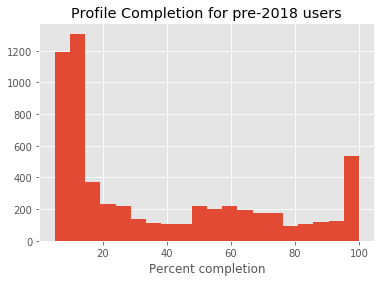

In [24]:
# Profile completion for users who created accounts in 2017 or earlier?
oldUsers = df.loc[df.joinDate <= 2017,:]

fig5 = plt.hist(oldUsers.profileCompletion, bins = 20)
plt.title('Profile Completion for pre-2018 users')
plt.xlabel("Percent completion")
print("Ratio of users with  5% or less of a profile: " + str(sum(oldUsers.profileCompletion<=5)/len(oldUsers.profileCompletion)))
print("Ratio of users with 10% or less of a profile: " + str(sum(oldUsers.profileCompletion<=10)/len(oldUsers.profileCompletion)))
print("Ratio of users with 15% or less of a profile: " + str(sum(oldUsers.profileCompletion<=15)/len(oldUsers.profileCompletion)))
print("Ratio of users with 40% or more of a profile: " + str(sum(oldUsers.profileCompletion>=40)/len(oldUsers.profileCompletion)))

### Apparently there's not much of a difference. Most people join and never complete their profiles.

## From now on, let's only look at users who have 40% of a profile and have signed in within the last year...

In [26]:
df = df.loc[(df.profileCompletion > 40) & (df.hoursSinceLogin < 8760), :]

Text(0.5,1,'Couch Status')

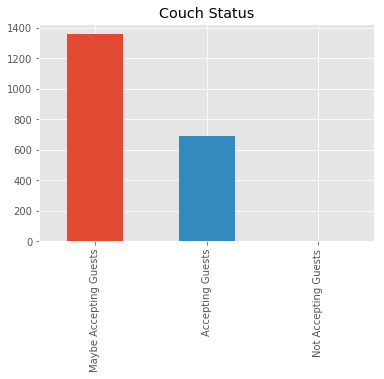

In [27]:
df['couchStatus'].value_counts().plot(kind='bar')
plt.title("Couch Status")

Ratio of users with zero references: 0.5959941377625794


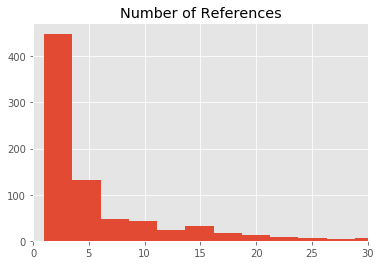

In [30]:
#df.nRefs[df.nRefs>0].value_counts().plot(kind = 'hist')
fig2 = plt.hist(df.nRefs[df.nRefs>0], log = False, bins = 100)
plt.title('Number of References')
plt.xlim(0,30)
print("Ratio of users with zero references: " + str(sum(df.nRefs==0)/len(df.nRefs)))

Text(0.5,1,'Hours since last login')

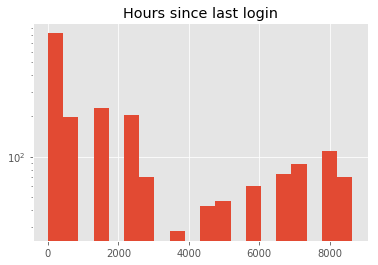

In [33]:
fig5 = plt.hist(df.hoursSinceLogin, log = True, bins = 20)
plt.title('Hours since last login')

Ratio of users with zero friends: 0.281875915974597


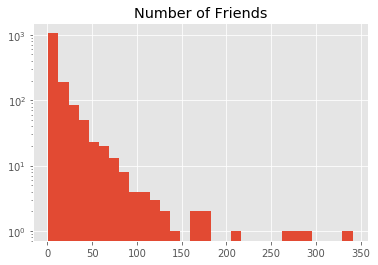

In [36]:
fig3 = plt.hist(df.nFriends[(df.nFriends>0) & (df.nFriends<500)], log = True, bins = 30)
plt.title('Number of Friends')
print("Ratio of users with zero friends: " + str(sum(df.nFriends==0)/len(df.nFriends)))

Ratio of users with zero languages: 0.13092330239374694


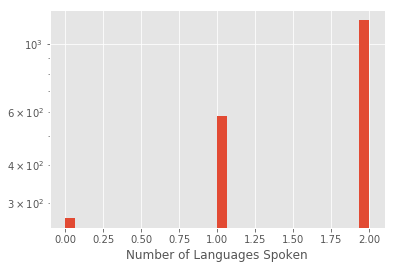

In [37]:
fig4 = plt.hist(df.nLanguages, log = True, bins = 30)
plt.xlabel('Number of Languages Spoken')

print("Ratio of users with zero languages: " + str(sum(df.nLanguages==0)/len(df.nLanguages)))

## How is the number of non-engaging users changing over time?